# Extreme Event Statistics

Sampling vectors with Gaussian random variables and obtaining the maximums of each of the sample vectors:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 200
sigma = 2
mean = 20
random_numbers = np.random.normal(
    loc=mean, scale=sigma, size=(100000, n_samples))
extreme_random_numbers = np.max(random_numbers, axis=1)

## Histogram of Maxima of Gaussian Random Variables

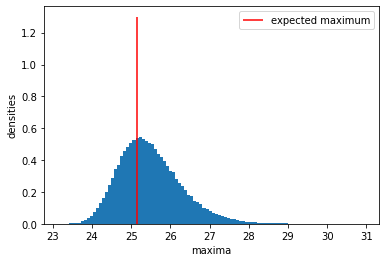

In [2]:
import scipy.stats
res = plt.hist(extreme_random_numbers, bins=100, density=True)
densities = res[0]
support_points = res[1][:-1]
plt.xlabel("maxima")
plt.ylabel("densities")

# this is a result from the Gumbel distribution https://en.wikipedia.org/wiki/Gumbel_distribution
# see https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution#Example_for_Normally_distributed_variables for formulas
mu_n = scipy.stats.norm.ppf(1.0-1.0/n_samples, loc=mean, scale=sigma)
sigma_n = scipy.stats.norm.ppf(
    1.0-1.0/n_samples*np.exp(-1), loc=mean, scale=sigma)-scipy.stats.norm.ppf(1-1/n_samples, loc=mean, scale=sigma)
gamma = np.euler_gamma

plt.vlines(mu_n, ymin=0, ymax=1.3,
           color="red", label="expected maximum")  # compare https://www.wolframalpha.com/input/?i=d%2Fdx%281%2Fsigma*exp%28-%28x-mu%29%2Fsigma%29*exp%28-exp%28-%28x-mu%29%2Fsigma%29%29%29%3D0+solve+for+x+and+x+real
plt.legend()

The Gumbell distribution matches the estimated density reported by the histogram method.

In [3]:
def generalized_extreme_value_density(x, mu, sigma):
    # see https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution, with case xi=0, i.e. the Gumbell distribution
    # https://en.wikipedia.org/wiki/Generalized_extreme_value_distribution#Example_for_Normally_distributed_variables
    def t(x):
        return np.exp(-(x-mu)/sigma)
    return 1/sigma*t(x)*np.exp(-t(x))

expected mean of maxima E[max(X)]: numeric 25.49212546422746, analytic 25.531047809267093


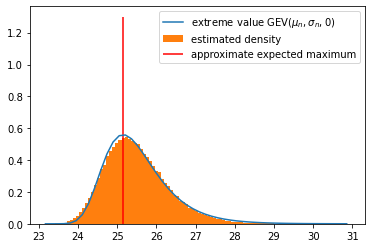

In [4]:
support = np.linspace(np.min(support_points), np.max(support_points))
plt.plot(support, generalized_extreme_value_density(support, mu_n,
         sigma_n), label=r"extreme value GEV($\mu_n, \sigma_n,0$)")
plt.hist(extreme_random_numbers, bins=100,
         density=True, label="estimated density")
plt.vlines(mu_n, ymin=0, ymax=1.3,
           color="red", label="approximate expected maximum")
plt.legend()

print(
    f"expected mean of maxima E[max(X)]: numeric {np.mean(extreme_random_numbers)}, analytic {mu_n+sigma_n*gamma}")